In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline

Using TensorFlow backend.


In [3]:
total_images_train_normal = os.listdir('../input/chest_xray/chest_xray/train/NORMAL/')
total_images_train_pneumonia = os.listdir('../input/chest_xray/chest_xray/train/PNEUMONIA/')

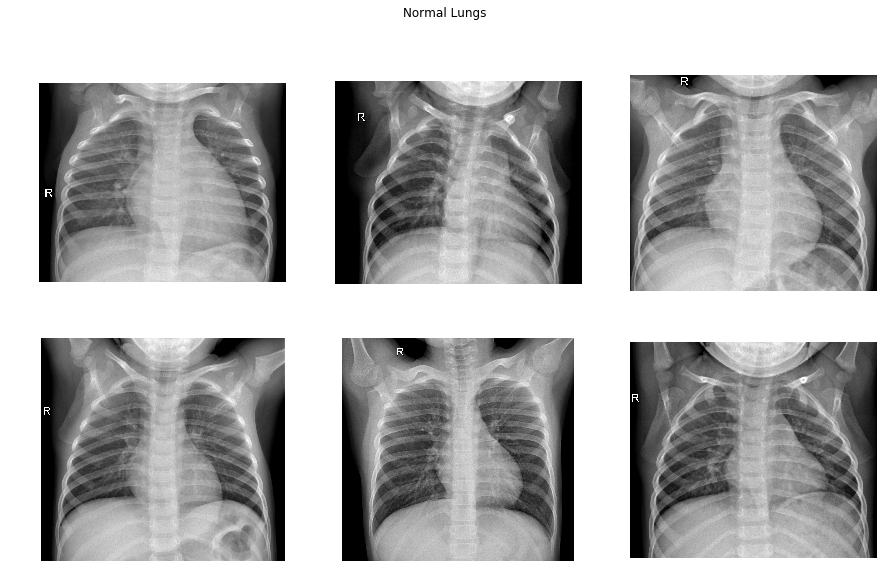

In [4]:
sample_normal = random.sample(total_images_train_normal,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/chest_xray/chest_xray/train/NORMAL/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Normal Lungs')
plt.show()

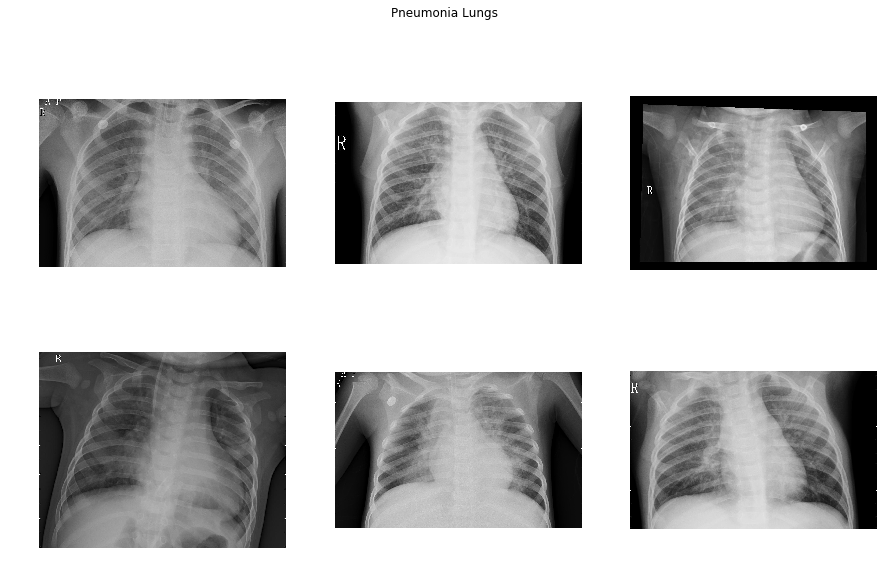

In [5]:
sample_pneumonia = random.sample(total_images_train_pneumonia,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/chest_xray/chest_xray/train/PNEUMONIA/'+sample_pneumonia[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Pneumonia Lungs')
plt.show()

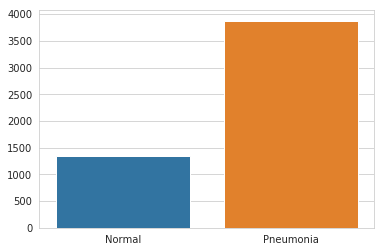

In [6]:
sns.set_style('whitegrid')
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])

In [7]:
image_height = 150
image_width = 150
batch_size = 10
no_of_epochs  = 10

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(image_height,image_width,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)       

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory('../input/chest_xray/chest_xray/train',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('../input/chest_xray/chest_xray/test',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='binary')

# Updated part --->
val_set = test_datagen.flow_from_directory('../input/chest_xray/chest_xray/val',
                                            target_size=(image_width, image_height),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [12]:
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

In [13]:
#training set
history = model.fit_generator(training_set,
                    steps_per_epoch=5216//batch_size,
                    epochs=no_of_epochs,
                    validation_data=test_set,
                    validation_steps=624//batch_size,
                    callbacks=callbacks
                   )

Epoch 1/10
521/521 [==============================] - 101s 195ms/step - loss: 0.4126 - accuracy: 0.8210 - val_loss: 0.3625 - val_accuracy: 0.8355
Epoch 2/10
521/521 [==============================] - 87s 166ms/step - loss: 0.2759 - accuracy: 0.8871 - val_loss: 0.4190 - val_accuracy: 0.7720
Epoch 3/10
521/521 [==============================] - 84s 161ms/step - loss: 0.2681 - accuracy: 0.8857 - val_loss: 0.3925 - val_accuracy: 0.8648
Epoch 4/10
521/521 [==============================] - 84s 161ms/step - loss: 0.2284 - accuracy: 0.9090 - val_loss: 0.1775 - val_accuracy: 0.8632
Epoch 5/10
521/521 [==============================] - 84s 160ms/step - loss: 0.2084 - accuracy: 0.9178 - val_loss: 0.1496 - val_accuracy: 0.8713
Epoch 6/10
521/521 [==============================] - 83s 160ms/step - loss: 0.1929 - accuracy: 0.9274 - val_loss: 0.2082 - val_accuracy: 0.8567
Epoch 7/10
521/521 [==============================] - 83s 160ms/step - loss: 0.1832 - accuracy: 0.9324 - val_loss: 0.0743 - val_a

In [14]:
# display indices marked by the system

print(test_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [15]:
history.history

{'val_loss': [0.3624754548072815,
  0.41895970702171326,
  0.39250415563583374,
  0.17751137912273407,
  0.14956220984458923,
  0.20817804336547852,
  0.07433243095874786,
  0.23226742446422577,
  0.16134124994277954,
  0.1756632924079895],
 'val_accuracy': [0.8354838490486145,
  0.7719869613647461,
  0.8648208379745483,
  0.8631922006607056,
  0.871335506439209,
  0.8566775321960449,
  0.8908794522285461,
  0.8908794522285461,
  0.8778501749038696,
  0.8941367864608765],
 'loss': [0.4126050794311798,
  0.27611107493368275,
  0.2680628115928092,
  0.228495831898912,
  0.20846923413422408,
  0.19295054780304305,
  0.18318696317722347,
  0.18753347876843077,
  0.1739120483570623,
  0.1670377358853784],
 'accuracy': [0.8209758,
  0.8870534,
  0.8857088,
  0.9089512,
  0.9177872,
  0.92739147,
  0.9323857,
  0.92739147,
  0.9350749,
  0.9377641],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

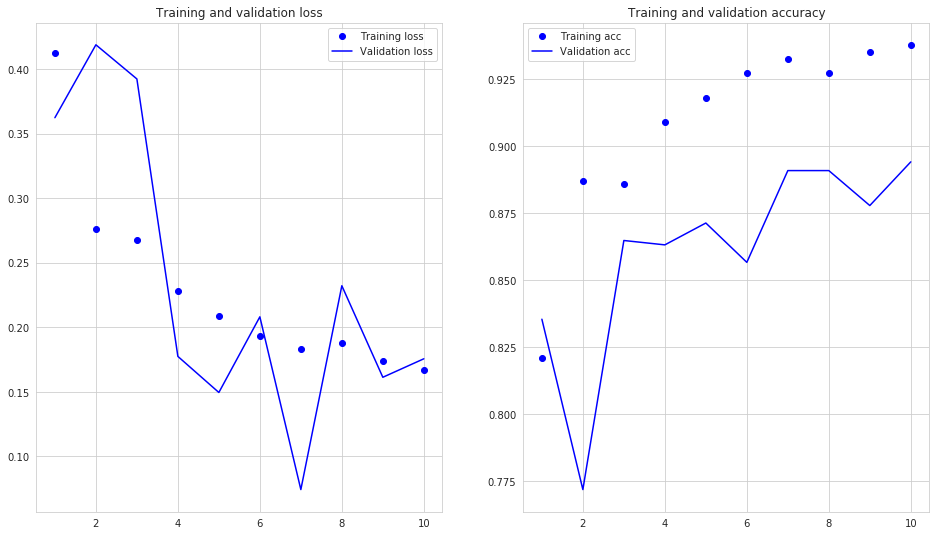

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [17]:
predictions = model.predict_generator(val_set, steps=16, verbose=1)

16/16 [==============================] - 0s 17ms/step


In [18]:
predictions.shape

(16, 1)